In [ ]:
import pandas as pd
import matplotlib.pyplot as plt         

## A)
## Read in the datafile
df0 = pd.read_csv("life-expectancy-vs-gdp-per-capita.csv")

pd.set_option('display.float_format', lambda x: '%.5f' % x)

## Using only the year 2018 differnce in
df2018 = df0.loc[df0['Year'] == 2018]
df2018 = df2018.dropna(subset=['GDP per capita', 'Life expectancy'])
del df2018['145446-annotations'], df2018['Continent']

plt.scatter(df2018['GDP per capita'], df2018['Life expectancy'])

fs = 15
plt.title("Life Expectancy versus GDP year 2018", fontsize = fs)
plt.xlabel("GDP per capita", fontsize = fs)
plt.ylabel("Life Expectancy", fontsize = fs)

plt.rcParams["figure.figsize"]=5,5
plt.show()

plt.title("Life Expectancy versus GDP year 2018 (log)", fontsize = fs)
plt.xlabel("GDP per capita", fontsize = fs)
plt.ylabel("Life Expectancy", fontsize = fs)

plt.scatter(df2018['GDP per capita'], df2018['Life expectancy'])
plt.xscale("log")

plt.rcParams["figure.figsize"]=5,5
plt.show()

In [ ]:
# d)

df1 = df2018.describe()
mean = df1.loc['mean']['Life expectancy']
std = df1.loc['std']['Life expectancy']


df2 = df2018.loc[df2018['Life expectancy'] > mean + std]
df2 = df2.sort_values(by= 'Life expectancy', ascending = False)

df2[['Entity','Life expectancy',]]

In [ ]:
# e)

lifeexpect = df1.loc['50%']['Life expectancy']

df2018['GDP'] = df2018['GDP per capita'] * df2018['Total population (Gapminder, HYDE & UN)']
df1 = df2018.describe()
mediangdp = df1.loc['50%']['GDP']
meangdp = df1.loc['mean']['GDP']


df3 = df2018.loc[(df2018['Life expectancy'] > lifeexpect) & (df2018['GDP'] < mediangdp)]
df4 = df2018.loc[(df2018['Life expectancy'] > lifeexpect) & (df2018['GDP'] < meangdp)] 

# If you prefer the median as an average
df3[['Entity','Life expectancy', 'GDP']]
# If you prefer the mean as an average
df4[['Entity','Life expectancy', 'GDP']]

In [ ]:
# f)

df5 = df2018.loc[(df2018['Life expectancy'] < lifeexpect) & (df2018['GDP'] > mediangdp)]
df6 = df2018.loc[(df2018['Life expectancy'] < lifeexpect) & (df2018['GDP'] > meangdp)]

# If you prefer the median as an average
df5[['Life expectancy','GDP']]
# If you prefer the mean as an average
df6[['Life expectancy','GDP']]

In [ ]:
# g)

mediangdppercapita = df1.loc['50%']['GDP per capita']
meangdppercapita = df1.loc['mean']['GDP per capita']

df7 = df2018.loc[(df2018['Life expectancy'] < lifeexpect) & (df2018['GDP per capita'] > mediangdppercapita)]
df8 = df2018.loc[(df2018['Life expectancy'] < lifeexpect) & (df2018['GDP per capita'] > meangdppercapita)]

df7
df8

In [ ]:
df00 = pd.read_csv('child-mortality-around-the-world.csv')
df00 = df00.loc[df00['Year'] == 2018]

df01 = pd.read_csv('life-expectancy-vs-gdp-per-capita.csv')
df01 = df01.loc[df01['Year'] == 2018]

df02 = df00.merge(df01)
df02.rename(columns={'Estimates, 1950 - 2020: Annually interpolated demographic indicators - Under-five mortality (deaths under age 5 per 1,000 live births)':'Mortality'}, inplace=True)

plt.title("GDP per capita versus Mortality 2018 (log)", fontsize = fs)
plt.xlabel("GDP per capita", fontsize = fs)
plt.ylabel("Mortality", fontsize = fs)
plt.xscale('log')

plt.scatter(df02['GDP per capita'], df02['Mortality'])


plt.show()

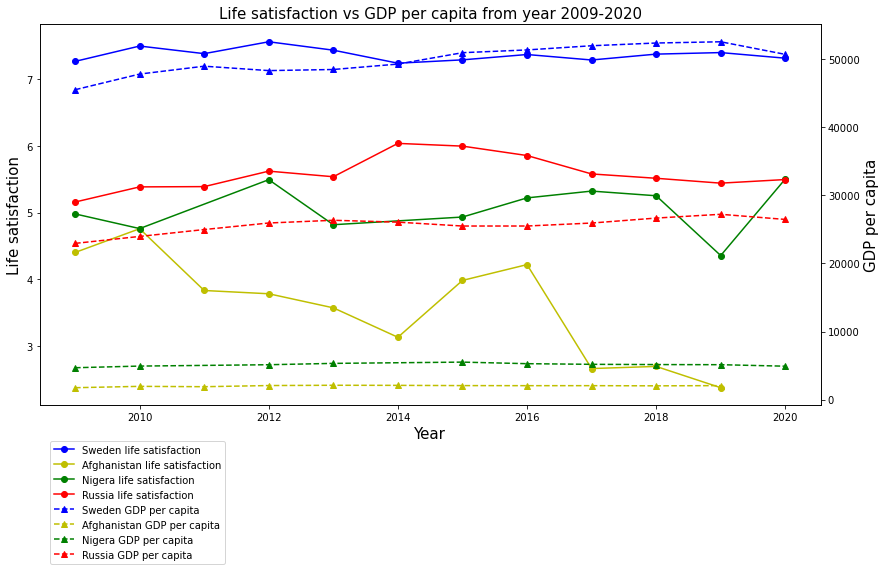

In [260]:
df03 = pd.read_csv('gdp-vs-happiness.csv')
df03 = df03.loc[df03['Year'] > 2008]
df03 = df03.dropna(subset=['Life satisfaction in Cantril Ladder (World Happiness Report 2021)', 'GDP per capita, PPP (constant 2017 international $)'])

dfswe = df03.loc[df03['Entity'] == 'Sweden']
dfswe_happy = dfswe['Life satisfaction in Cantril Ladder (World Happiness Report 2021)']
dfswe_gdp = dfswe['GDP per capita, PPP (constant 2017 international $)']
dfswe_year = dfswe['Year']

dfafg = df03.loc[df03['Entity'] == 'Afghanistan']
dfafg_happy = dfafg['Life satisfaction in Cantril Ladder (World Happiness Report 2021)']
dfafg_gdp = dfafg['GDP per capita, PPP (constant 2017 international $)']
dfafg_year = dfafg['Year']

dfnig = df03.loc[df03['Entity'] == 'Nigeria']
dfnig_happy = dfnig['Life satisfaction in Cantril Ladder (World Happiness Report 2021)']
dfnig_gdp = dfnig['GDP per capita, PPP (constant 2017 international $)']
dfnig_year = dfnig['Year']

dfrus = df03.loc[df03['Entity'] == 'Russia']
dfrus_happy = dfrus['Life satisfaction in Cantril Ladder (World Happiness Report 2021)']
dfrus_gdp = dfrus['GDP per capita, PPP (constant 2017 international $)']
dfrus_year = dfrus['Year']

fig, ax = plt.subplots(figsize=(14,7))

ax1 = ax.twinx()
axswe = ax.plot(dfswe_year, dfswe_happy, linestyle='-', marker='o', color='b', label='Sweden life satisfaction')
axswe1 = ax1.plot(dfswe_year, dfswe_gdp, linestyle='--', marker='^', color='b', label='Sweden GDP per capita')

axafg = ax.plot(dfafg_year,dfafg_happy, linestyle='-', marker='o', color='y', label='Afghanistan life satisfaction')
axafg1 = ax1.plot(dfafg_year,dfafg_gdp, linestyle='--', marker='^', color='y', label='Afghanistan GDP per capita')

axnig = ax.plot(dfnig_year, dfnig_happy, linestyle='-', marker='o', color='g', label='Nigera life satisfaction')
axnig1 = ax1.plot(dfnig_year, dfnig_gdp, linestyle='--', marker='^', color='g', label='Nigera GDP per capita')

axrus = ax.plot(dfrus_year, dfrus_happy, linestyle='-', marker='o', color='r', label='Russia life satisfaction')
axrus1 = ax1.plot(dfrus_year, dfrus_gdp, linestyle='--', marker='^', color='r', label='Russia GDP per capita')

plt.title("Life satisfaction vs GDP per capita from year 2009-2020", fontsize = fs)
ax.set_xlabel("Year", fontsize = fs)
ax.set_ylabel("Life satisfaction", fontsize = fs)
ax1.set_ylabel("GDP per capita", fontsize = fs)
plt.rcParams["figure.figsize"]=20,20

fig.legend(loc='lower left', bbox_to_anchor=(0.13,-0.2))